In [17]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.semi_supervised import LabelPropagation
from sklearn.model_selection import train_test_split

In [18]:
df = pd.read_csv('data.csv')
mood = pd.Series([-1] * len(df))
df['mood'] = mood
df = df.drop(['playlist_id'], axis=1)
df.head()

,track_id,track_name,popularity,danceability,energy,acousticness,valence,tempo,mood
0,4f13AaRyukUTWleyKXaRDh,Smoke Filled Room,59,0.574,0.731,0.02400,0.3930,127.925,-1
1,3bNopejTiuFxDpB7CZhaRX,Almost Famous,34,0.699,0.521,0.03390,0.0906,124.051,-1
2,0CAfXk7DXMnon4gLudAp7J,Low (feat T-Pain),73,0.918,0.609,0.09280,0.3040,128.008,-1
3,5v54ZQ0glzbB9XUPTaX0cj,Apollo - Radio Edit,49,0.560,0.742,0.01500,0.2700,128.060,-1
4,5sYzg83Vy4IW4TfE9jwk8g,Invincible - Radio Edit,49,0.613,0.775,0.00678,0.3850,127.906,-1


## Goals:
- Develop a new algorithm for separating songs
- Prove its effectiveness
- Only use songs with high probability of belonging to label

In [19]:
data = df.values
labeled = pd.read_csv('labeled.csv')
for idx, name in enumerate(df['track_name']):
    if name in labeled['track_name'].values:
        df['mood'][idx] = labeled[labeled['track_name'] == name]['mood']
#propagated, unlabeled = train_test_split(data, test_size=30)

/Users/chase/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


## Moods:
    0: Depressed
    1: Excited
    2: Aggressive
    3: Relaxing
    4: Cheerful

In [20]:
fit_X = df.iloc[:, 4:9].values
fit_y = df['mood'].values
def num_different(a, b):
    return np.sum(a == b)
models = []
for iter_ in range(100, 1000, 100):
    models.append(LabelPropagation(alpha=0.5, max_iter=iter_))


for model in models:
    model.fit(fit_X, fit_y)
control_model = LabelPropagation(alpha=0.5, max_iter=1000)
control = control_model.fit(fit_X, fit_y).transduction_
[num_different(model.transduction_, control) for model in models]
# obvious that 100 iterations is by far enough for precision

[736, 736, 736, 736, 736, 736, 736, 736, 736]

In [21]:
lp = LabelPropagation(alpha=0.5, max_iter=100)
lp.fit(fit_X, fit_y)
new_df = df.copy()
new_df['mood'] = lp.transduction_
lp.transduction_

array([3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1, 2, 1, 2, 2, 1, 1, 0, 1, 0, 2,
       2, 0, 1, 2, 2, 2, 2, 2, 1, 2, 2, 2, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 1, 1, 0, 1, 0, 2, 0, 0, 0, 0, 0, 4, 1,
       2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2, 2, 2,
       1, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 0, 1, 0, 0, 1, 0, 2, 1, 1, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 2,
       1, 0, 0, 0, 2, 0, 2, 2, 1, 1, 1, 0, 2, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 2, 0, 1, 1, 2, 1, 1, 2, 2, 1, 2, 0, 0, 0, 0, 3, 0,
       2, 1, 2, 0, 1, 0, 0, 1, 0, 4, 1, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0,

In [22]:
new_df.head()

,track_id,track_name,popularity,danceability,energy,acousticness,valence,tempo,mood
0,4f13AaRyukUTWleyKXaRDh,Smoke Filled Room,59,0.574,0.731,0.02400,0.3930,127.925,3
1,3bNopejTiuFxDpB7CZhaRX,Almost Famous,34,0.699,0.521,0.03390,0.0906,124.051,0
2,0CAfXk7DXMnon4gLudAp7J,Low (feat T-Pain),73,0.918,0.609,0.09280,0.3040,128.008,0
3,5v54ZQ0glzbB9XUPTaX0cj,Apollo - Radio Edit,49,0.560,0.742,0.01500,0.2700,128.060,0
4,5sYzg83Vy4IW4TfE9jwk8g,Invincible - Radio Edit,49,0.613,0.775,0.00678,0.3850,127.906,0


In [23]:
print(len(new_df['mood']) == len(lp.label_distributions_[:, 2]))
new_df [(lp.label_distributions_[:, 2] > .95)]

True


,track_id,track_name,popularity,danceability,energy,acousticness,valence,tempo,mood
55,3ZffCQKLFLUvYM59XKLbVm,Wake Me Up When September Ends,73,0.546,0.8140,0.023000,0.1330,104.980,2
56,3p1vmXEMvcESM36eFG8dUU,GString,34,0.569,0.8910,0.080400,0.3070,110.034,2
59,1MwnqTZQR89Y0LOLMJUceN,Gold Love - feat. Rosie Oddie,31,0.468,0.9070,0.001690,0.0379,108.738,2
61,2nLtzopw4rPReszdYBJU6h,Numb,76,0.496,0.8630,0.004600,0.2440,110.018,2
62,6AbVJjzv7thIvmMCuhZrmK,Make It Bun Dem,62,0.556,0.8810,0.001190,0.3360,104.973,2
68,24lMtPOCzP5g4hrg3NklLa,Just The Way You Are,25,0.637,0.8430,0.015100,0.4410,109.012,2
69,3jKK4kpTJEnTX5oQt0Hokj,Cantina Boys,34,0.637,0.9630,0.139000,0.4020,105.055,2
72,60a0Rd6pjrkxjPbaKzXjfq,In The End,79,0.553,0.9000,0.011300,0.3970,105.213,2
73,2Zb4HgZEvWfnBDGgC0Lnc0,The Calm - Album Version (Edited),28,0.466,0.6290,0.810000,0.2500,160.122,2
74,1uIjVysHAMBXEr8Arx7tfT,Ave,47,0.587,0.0877,0.952000,0.0842,159.801,2


In [24]:
lp.predict_proba(fit_X)[:, 2].max()

nan

In [25]:
pd.DataFrame(lp.label_distributions_).iloc[79, :]

0    2.942404e-127
1     2.064568e-68
2     1.000000e+00
3     1.411094e-84
4    7.054490e-165
Name: 79, dtype: float64

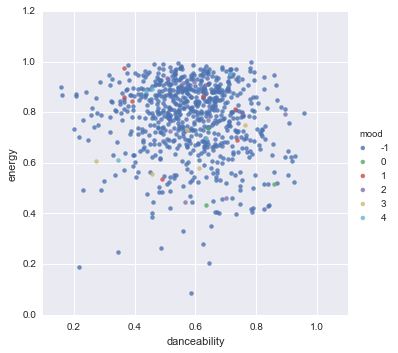

In [26]:
sns.lmplot('danceability', 'energy', data=df, hue='mood', fit_reg=False)

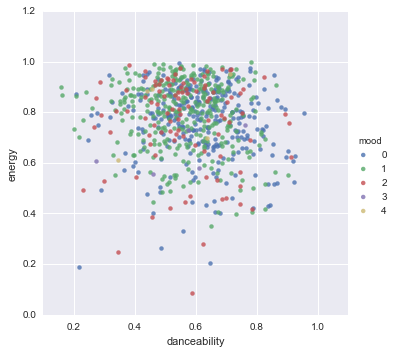

In [27]:
sns.lmplot('danceability', 'energy', data=new_df, hue='mood', fit_reg=False)

/Users/chase/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


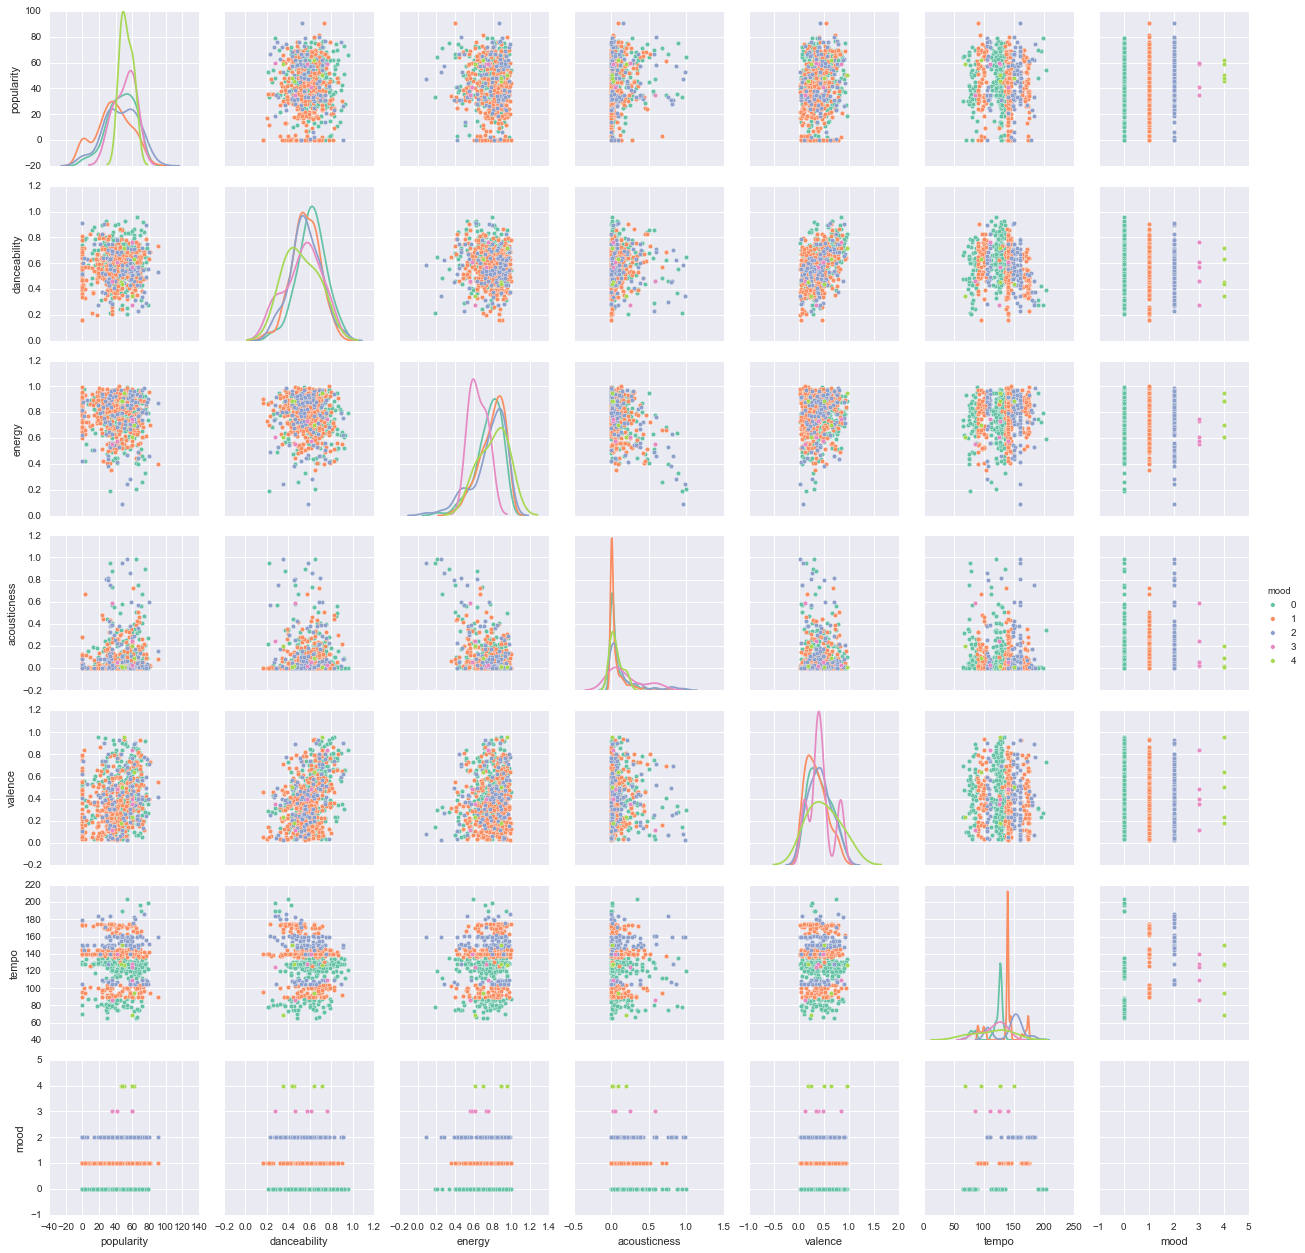

In [28]:
sns.pairplot(new_df, hue="mood", palette="Set2", diag_kind="kde", size=2.5)

/Users/chase/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


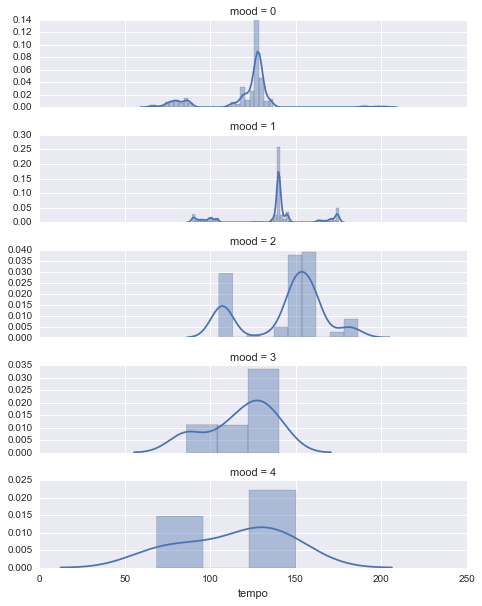

In [33]:
g = sns.FacetGrid(new_df, row="mood", sharey=False,
                  size=1.7, aspect=4,)
g.map(sns.distplot, "tempo")

/Users/chase/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


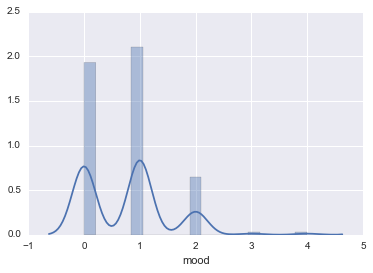

In [35]:
sns.distplot(new_df['mood'])

## References
Stéfan van der Walt, S. Chris Colbert and Gaël Varoquaux. The NumPy Array: A Structure for Efficient Numerical Computation, Computing in Science & Engineering, 13, 22-30 (2011)

John D. Hunter, "Matplotlib: A 2D Graphics Environment", Computin

Raschka, Sebastian, and Randal S. Olson. Python Machine Learning: Unlock Deeper Insights into Machine    Learning with This Vital Guide to Cutting-edge Predictive Analytics. Birmingham: Packt, 2015. Print.g in Science & Engineering, vol.9, no. 3, pp. 90-95, May/June 2007, doi:10.1109/MCSE.2007.55  